Part 1 Tutorial - # Tensor Basics, #Gradient Calculation # Backpropagation #Gradient Descent #Training Pipeline

In [2]:
import torch
import numpy as np

(1) Basic Tensor Creation

In [3]:
x1=torch.rand(2,2)
x2=torch.rand(2,2,dtype=torch.double)
x2=torch.rand(2,2,dtype=torch.float16)
x3=torch.tensor([2.5,1.5])

Arithmetic Operation

In [4]:
#Arithmetic Operations

x=torch.rand(2,2)
y=torch.rand(2,2)

print("Value of x is:",x)
print("Value of y is", y)

add=torch.add(x,y)   #Other alternatives are x+y, y.add_(x)- underscore in pytorch is a inplace operation.
sub=y.sub_(x)
mult=x * y
div=x.div(y)

# Same form of operations are followed for all the arithmetic operations.

print("Addition output:",add)
print("Subtraction output:",sub)
print("Multiplication output:",mult)
print("Division output:",div)

Value of x is: tensor([[0.6610, 0.2696],
        [0.5430, 0.1638]])
Value of y is tensor([[0.3380, 0.9894],
        [0.0842, 0.4287]])
Addition output: tensor([[0.9991, 1.2589],
        [0.6272, 0.5925]])
Subtraction output: tensor([[-0.3230,  0.7198],
        [-0.4589,  0.2649]])
Multiplication output: tensor([[-0.2135,  0.1940],
        [-0.2492,  0.0434]])
Division output: tensor([[-2.0464,  0.3745],
        [-1.1834,  0.6184]])


Slicing Operations

In [5]:
x=torch.rand(5,5)
print(x)

print("Slicing Operations")
print("First Column",x[:,0])
print("First Row",x[1,:])
print("Element at a particular value 2,2:",x[2,2].item())


tensor([[0.7693, 0.9111, 0.6808, 0.1092, 0.3119],
        [0.6910, 0.5135, 0.9207, 0.1406, 0.6085],
        [0.6909, 0.0756, 0.9123, 0.5864, 0.8095],
        [0.1503, 0.8445, 0.8796, 0.7204, 0.2820],
        [0.4507, 0.1932, 0.2962, 0.2437, 0.2238]])
Slicing Operations
First Column tensor([0.7693, 0.6910, 0.6909, 0.1503, 0.4507])
First Row tensor([0.6910, 0.5135, 0.9207, 0.1406, 0.6085])
Element at a particular value 2,2: 0.9123489856719971


Reshaping a Tensor

In [6]:
x=torch.rand(4,4)
print(x)

y=x.view(16) # Converting to a 1D vector
print("1D dimension",y)


y=x.view(-1,8) # The column is mentioned but row is not mentioned.
print("Columns is 8 dimension but row dimension not known", y)



tensor([[0.9073, 0.4132, 0.0472, 0.7491],
        [0.3575, 0.9379, 0.0426, 0.8072],
        [0.5089, 0.3601, 0.4796, 0.9921],
        [0.5862, 0.9473, 0.1060, 0.6288]])
1D dimension tensor([0.9073, 0.4132, 0.0472, 0.7491, 0.3575, 0.9379, 0.0426, 0.8072, 0.5089,
        0.3601, 0.4796, 0.9921, 0.5862, 0.9473, 0.1060, 0.6288])
Columns is 8 dimension but row dimension not known tensor([[0.9073, 0.4132, 0.0472, 0.7491, 0.3575, 0.9379, 0.0426, 0.8072],
        [0.5089, 0.3601, 0.4796, 0.9921, 0.5862, 0.9473, 0.1060, 0.6288]])


Converting Numpy to torch tensor

In [7]:
import numpy as np

test=torch.ones(5)
print(test)

test_numpy=test.numpy()
print(test)

#converting from numpy to torch tensor
a=np.ones(5)
print("Numpy array:",a)
b=torch.from_numpy(a)
print("Torch array:",b)


tensor([1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1.])
Numpy array: [1. 1. 1. 1. 1.]
Torch array: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [8]:
#important note
#if the tensor is modified through some arithmetic operation the value of both the tensor and the numpy array gets updated
#This is a case if the tensor is on the GPU.
b+=1
print(b)
print(a)



tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[2. 2. 2. 2. 2.]


In [9]:
#Checking
if torch.cuda.is_available():
    device=torch.device("cuda")
    x=torch.ones(5,device=device)
    y=torch.ones(5)
    y=y.to(device)
    z=x+y
    z=z.numpy()

In [10]:
# Tells the pytorch that later the gradient of the tensors needs to be calculated in the later stage. A variable which needs to be optimized needs to be set into this.
x=torch.ones(5,requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


(2) Calculation of Gradient using Autograd
<br/> The equation for back propagation is utilized using the jacobian equation<br/>
<img src="images/image.png">
<img src="images/jacobian.png">

In [11]:
x=torch.randn(3,requires_grad=True)
print("X is ",x)
y=x+2

#Calculating the gradient of y with respect to x. that is grad=dy/dx
#As we are specifying requires_grad=True, pytorch will create a function for us which is used for backpropagation. gradient function grad_fn() is invoked.
#The gradient of y with respect to x is calculated
print("Y is :", y)

z=y*y*2
z=z.mean()
print("Z is:", z)


z.backward() #dz/dx , this needs to be multiplied with a scaler argument.
print("X is ",x.grad)

X is  tensor([ 1.3340, -1.5590,  1.1495], requires_grad=True)
Y is : tensor([3.3340, 0.4410, 3.1495], grad_fn=<AddBackward0>)
Z is: tensor(14.1526, grad_fn=<MeanBackward0>)
X is  tensor([4.4453, 0.5880, 4.1993])


Preventing pytorch from tracking the history and calculating the grad_fn attribute.

Procedures
(a) x.requires_grad_(False)<br/>
(b) x.detach()      creates a new  tensor that doesnt require the gradient.<br/>
(c) with torch.no_grad():<br/>


In [12]:
x=torch.randn(3,requires_grad=True)
print("X is ",x)
x.requires_grad=False
print('X is ',x)

X is  tensor([-1.6736,  0.5971,  0.6497], requires_grad=True)
X is  tensor([-1.6736,  0.5971,  0.6497])


In [13]:
x=torch.randn(3,requires_grad=True)
print("X is ",x)
y=x.detach() #creates a separate vector that doesn't require gradient
print('X is ',y)

X is  tensor([0.3139, 2.1490, 0.2889], requires_grad=True)
X is  tensor([0.3139, 2.1490, 0.2889])


In [14]:
x=torch.randn(3,requires_grad=True)
print("X is ",x)
with torch.no_grad():
    y=y+2
    print(y)

X is  tensor([ 0.3360, -0.0964, -0.6682], requires_grad=True)
tensor([2.3139, 4.1490, 2.2889])


The backward() function the tensor will be accumulated into the .grad attribute. So their values will be summed up if y=x+2

In [15]:
#Problem : It can be observed that the gradient is getting stored.
weights=torch.ones(4,requires_grad=True)

for epoch in range(10):
    model_output=(weights*3).sum()
    model_output.backward()
    print(weights.grad)

#Before the Next operation needs to be done the gradient needs to be cleared.
print("=======Clearing the gradients=========")


weights=torch.ones(4,requires_grad=True)

for epoch in range(10):
    model_output=(weights*3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_() 

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])
tensor([15., 15., 15., 15.])
tensor([18., 18., 18., 18.])
tensor([21., 21., 21., 21.])
tensor([24., 24., 24., 24.])
tensor([27., 27., 27., 27.])
tensor([30., 30., 30., 30.])
=======Clearing the gradients=========
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


<h2 color=red>Simple Neuron Evaluation and Back Propagation</h2><br/>
<img src="images/1.jpeg"><br/>
<img src="images/2.png"><br/>
<img src="images/3.png"><br/>
<img src="images/4.jpeg"><br/>

Input X=1.0, y=2.0 and w=1.0. Now Evaluating forward pass and back propagation

In [16]:


x=torch.tensor(1.0)
y=torch.tensor(2.0)
w=torch.tensor(1.0,requires_grad=True)

y_hat=w*x  #Forward Pass

loss=(y_hat-y)**2  #Evaluating squared loss

print("The Loss is:",loss);

The Loss is: tensor(1., grad_fn=<PowBackward0>)


In [17]:
#Evaluating Backward Pass
loss.backward()  #This is the whole gradient computation

print("The first change in gradient after first backpropagation",w.grad)



The first change in gradient after first backpropagation tensor(-2.)


In [18]:
w.grad.zero_()

tensor(0.)

In [19]:
#Performing the Backpropagation and forward for some time.
epoch=10
for i in range(epoch):
    y_hat=w*x
    loss=(y_hat-y)**2
    loss.backward()
    print("Epoch ",i," loss :",w.grad)
    w.grad.zero_()
    

Epoch  0  loss : tensor(-2.)
Epoch  1  loss : tensor(-2.)
Epoch  2  loss : tensor(-2.)
Epoch  3  loss : tensor(-2.)
Epoch  4  loss : tensor(-2.)
Epoch  5  loss : tensor(-2.)
Epoch  6  loss : tensor(-2.)
Epoch  7  loss : tensor(-2.)
Epoch  8  loss : tensor(-2.)
Epoch  9  loss : tensor(-2.)


<h2> Manual Evaluation of a Neural Network using Numpy</h2>


In [20]:
#Linear Regression
#function=weight*X
#Lets take and example let Function=2*X

x=np.array([1,2,3,4],dtype=np.float32)
y=np.array([2,4,5,8],dtype=np.float32)
w=0.0

#Calculating model prediction
def forward(x):
    return w*x

def loss(y,y_pred):
    temp=(y_pred-y)**2    #Mean Squared Error MSE=[((w*x)-y_pred)^2] / N
    return temp.mean()

#Evaluating gradient
#dJ/dw=1/N 2x  (w*x-y)

def gradient(x,y,y_pred):
    return np.dot(2*x,y_pred-y).mean()

print(f'Prediction before training :f(5)={forward(25):.3f}')

#Training Process
learning_rate=0.001
n_iters=100

print("Training Process Started")
for epoch in range(n_iters):
    y_pred=forward(x)
    l=loss(y,y_pred)
    dw=gradient(x,y,y_pred)

    #Updating the weights using Gradient Descent
    #Goes into the negative gradient

    #weight Update
    w-=learning_rate*dw

    
    print(f'epoch {epoch+1}| w={w:.3f} | loss={l:0.3f}')

print("Training Process Ended")
print(f'Prediction After training :f(5)={forward(25):.3f}')



Prediction before training :f(5)=0.000
Training Process Started
epoch 1| w=0.114 | loss=27.250
epoch 2| w=0.221 | loss=24.098
epoch 3| w=0.322 | loss=21.314
epoch 4| w=0.417 | loss=18.853
epoch 5| w=0.506 | loss=16.679
epoch 6| w=0.589 | loss=14.758
epoch 7| w=0.668 | loss=13.061
epoch 8| w=0.742 | loss=11.561
epoch 9| w=0.811 | loss=10.235
epoch 10| w=0.877 | loss=9.064
epoch 11| w=0.938 | loss=8.030
epoch 12| w=0.996 | loss=7.115
epoch 13| w=1.050 | loss=6.307
epoch 14| w=1.101 | loss=5.594
epoch 15| w=1.149 | loss=4.963
epoch 16| w=1.194 | loss=4.406
epoch 17| w=1.236 | loss=3.913
epoch 18| w=1.276 | loss=3.478
epoch 19| w=1.314 | loss=3.094
epoch 20| w=1.349 | loss=2.754
epoch 21| w=1.382 | loss=2.454
epoch 22| w=1.413 | loss=2.188
epoch 23| w=1.442 | loss=1.954
epoch 24| w=1.470 | loss=1.747
epoch 25| w=1.495 | loss=1.564
epoch 26| w=1.520 | loss=1.402
epoch 27| w=1.543 | loss=1.259
epoch 28| w=1.564 | loss=1.133
epoch 29| w=1.584 | loss=1.022
epoch 30| w=1.603 | loss=0.923
epoch 

<h2>Model Evaluation using Pytorch using Autograd</h2>

In [21]:
#Linear Regression
#function=weight*X
#Lets take and example let Function=2*X

x=torch.tensor([1,2,3,4],dtype=torch.float32)
y=torch.tensor([2,4,5,8],dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#Calculating model prediction
def forward(x):
    return w*x

def loss(y,y_pred):
    temp=(y_pred-y)**2    #Mean Squared Error MSE=[((w*x)-y_pred)^2] / N
    return temp.mean()

#Evaluating gradient


print(f'Prediction before training :f(5)={forward(5):.3f}')

#Training Process
learning_rate=0.01
n_iters=1000

print("Training Process Started")
for epoch in range(n_iters):
    y_pred=forward(x)
    l=loss(y,y_pred)
    l.backward() #calculates gradient of loss wrt w. dl/dw

    #Updating the weights using Gradient Descent
    #Goes into the negative gradient

    with torch.no_grad():
        w-=learning_rate*w.grad

    #making gradient zero
    w.grad.zero_()
    
    print(f'epoch {epoch+1}| w={w:.3f} | loss={l:0.3f}')

print("Training Process Ended")
print(f'Prediction After training :f(5)={forward(5):.3f}')



Prediction before training :f(5)=0.000
Training Process Started
epoch 1| w=0.285 | loss=27.250
epoch 2| w=0.527 | loss=19.737
epoch 3| w=0.733 | loss=14.308
epoch 4| w=0.908 | loss=10.386
epoch 5| w=1.057 | loss=7.553
epoch 6| w=1.183 | loss=5.505
epoch 7| w=1.291 | loss=4.026
epoch 8| w=1.382 | loss=2.957
epoch 9| w=1.460 | loss=2.185
epoch 10| w=1.526 | loss=1.627
epoch 11| w=1.582 | loss=1.224
epoch 12| w=1.630 | loss=0.933
epoch 13| w=1.670 | loss=0.723
epoch 14| w=1.705 | loss=0.571
epoch 15| w=1.734 | loss=0.461
epoch 16| w=1.759 | loss=0.382
epoch 17| w=1.780 | loss=0.324
epoch 18| w=1.798 | loss=0.283
epoch 19| w=1.813 | loss=0.253
epoch 20| w=1.826 | loss=0.231
epoch 21| w=1.837 | loss=0.216
epoch 22| w=1.847 | loss=0.204
epoch 23| w=1.855 | loss=0.196
epoch 24| w=1.862 | loss=0.190
epoch 25| w=1.867 | loss=0.186
epoch 26| w=1.872 | loss=0.183
epoch 27| w=1.876 | loss=0.181
epoch 28| w=1.880 | loss=0.179
epoch 29| w=1.883 | loss=0.178
epoch 30| w=1.886 | loss=0.177
epoch 31| w

Implmenting Prediction: Using Pytorch Model | Gradient Computation: Autograd Package | Loss Computation: Pytorch  Loss | Parameter Update: Pytorch Optimizer <br/><br/>

Neural Network Procedure in Pytorch<br/>
a. Designing the Model ( inputsize, outputsize, forward pass)<br/>
b. Contruction of the Loss function and the Optimizer.<br/>
c. Training Loop:<br/>
    - forward pass: Estimate the Prediction<br/>
    -backward pass: Gradients<br/>
    -Update Weights<br/>


In [22]:
# Now the above code 
import torch.nn as nn   #neural Network

# The shape needs to be modified so that now Each data is a row of the features with its respective Y value.
x=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y=torch.tensor([[2],[4],[5],[8]],dtype=torch.float32)

n_samples,n_features=x.shape

input_size=n_features
output_size=n_features
#Calculating model prediction
#{w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)} . We do not require the weights initialization.
#This code {def forward(x):
#            return w*x}. Is replace with the pytorch model.

model=nn.Linear(input_size,output_size)

#Creating a test data for prediction
X_test=torch.tensor([10],dtype=torch.float32)

print(f'Prediction before training : f(10)={model(X_test).item():.3f}')
  


#Training Process
learning_rate=0.02
n_iters=500

#This is loss is now defined in the torch.nn module and we are also using the Stochastic Gradient Descent Optimizer. 
#The optim.SGD takes a list, the first one is the weight and the second is the learning rate.
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

print("Training Process Started")
for epoch in range(n_iters):
    y_pred=model(x)
    l=loss(y,y_pred)
    l.backward() #calculates gradient of loss wrt w. dl/dw

    #Updating the weights using Gradient Descent
    #The next two lines are the replacement for the code:
    #{ with torch.no_grad():
     #   w-=learning_rate*w.grad

    #w.grad.zero_()}
    
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10==0:
        [w,b]=model.parameters()  #unpacking the weights and biases
        print(f'epoch {epoch+1}| w={w[0][0].item():.3f} | loss={l:0.3f}')
    
    

print("Training Process Ended")
print(f'Prediction After training :f(10)={model(X_test).item():.3f}')



Prediction before training : f(10)=-0.068


Training Process Started
epoch 1| w=0.416 | loss=22.014
epoch 11| w=1.438 | loss=0.470
epoch 21| w=1.481 | loss=0.431
epoch 31| w=1.506 | loss=0.402
epoch 41| w=1.529 | loss=0.377
epoch 51| w=1.550 | loss=0.354
epoch 61| w=1.571 | loss=0.334
epoch 71| w=1.590 | loss=0.316
epoch 81| w=1.608 | loss=0.300
epoch 91| w=1.625 | loss=0.286
epoch 101| w=1.641 | loss=0.273
epoch 111| w=1.656 | loss=0.262
epoch 121| w=1.670 | loss=0.252
epoch 131| w=1.684 | loss=0.243
epoch 141| w=1.696 | loss=0.236
epoch 151| w=1.708 | loss=0.229
epoch 161| w=1.719 | loss=0.223
epoch 171| w=1.730 | loss=0.217
epoch 181| w=1.740 | loss=0.213
epoch 191| w=1.749 | loss=0.208
epoch 201| w=1.758 | loss=0.205
epoch 211| w=1.766 | loss=0.201
epoch 221| w=1.774 | loss=0.198
epoch 231| w=1.781 | loss=0.196
epoch 241| w=1.788 | loss=0.193
epoch 251| w=1.795 | loss=0.191
epoch 261| w=1.801 | loss=0.189
epoch 271| w=1.807 | loss=0.188
epoch 281| w=1.812 | loss=0.186
epoch 291| w=1.817 | loss=0.185
epoch 301| w=1.822 | loss

Creating a Custom Linear Regression Model

In [23]:
# We will be wrapping the Linear regression model from the torch package into a Class.

# Now the above code 
import torch.nn as nn   #neural Network

# The shape needs to be modified so that now Each data is a row of the features with its respective Y value.
x=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y=torch.tensor([[2],[4],[5],[8]],dtype=torch.float32)

n_samples,n_features=x.shape

input_size=n_features
output_size=n_features

# =====Defining Custom Model====
class MyLinear(nn.Module):

    def __init__(self,input_dim,output_dim):
        super(MyLinear,self).__init__()
        #defining the Layers : We define a single layer
        self.lin=nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        return self.lin(x)


# Instead of "model=nn.Linear(input_size,output_size)" we will use custom defined model

model=MyLinear(input_size,output_size)   


#Creating a test data for prediction
X_test=torch.tensor([10],dtype=torch.float32)

print(f'Prediction before training : f(10)={model(X_test).item():.3f}')
  


#Training Process
learning_rate=0.02
n_iters=500

#This is loss is now defined in the torch.nn module and we are also using the Stochastic Gradient Descent Optimizer. 
#The optim.SGD takes a list, the first one is the weight and the second is the learning rate.
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

print("Training Process Started")
for epoch in range(n_iters):
    y_pred=model(x)
    l=loss(y,y_pred)
    l.backward() #calculates gradient of loss wrt w. dl/dw

    #Updating the weights using Gradient Descent
    #The next two lines are the replacement for the code:
    #{ with torch.no_grad():
     #   w-=learning_rate*w.grad

    #w.grad.zero_()}
    
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10==0:
        [w,b]=model.parameters()  #unpacking the weights and biases
        print(f'epoch {epoch+1}| w={w[0][0].item():.3f} | loss={l:0.3f}')
    
    

print("Training Process Ended")
print(f'Prediction After training :f(10)={model(X_test).item():.3f}')



Prediction before training : f(10)=-5.796
Training Process Started
epoch 1| w=0.216 | loss=48.980
epoch 11| w=1.723 | loss=0.223
epoch 21| w=1.757 | loss=0.205
epoch 31| w=1.766 | loss=0.201
epoch 41| w=1.774 | loss=0.198
epoch 51| w=1.781 | loss=0.196
epoch 61| w=1.788 | loss=0.193
epoch 71| w=1.795 | loss=0.191
epoch 81| w=1.801 | loss=0.189
epoch 91| w=1.807 | loss=0.188
epoch 101| w=1.812 | loss=0.186
epoch 111| w=1.817 | loss=0.185
epoch 121| w=1.822 | loss=0.184
epoch 131| w=1.827 | loss=0.183
epoch 141| w=1.831 | loss=0.182
epoch 151| w=1.835 | loss=0.181
epoch 161| w=1.839 | loss=0.180
epoch 171| w=1.842 | loss=0.180
epoch 181| w=1.846 | loss=0.179
epoch 191| w=1.849 | loss=0.179
epoch 201| w=1.852 | loss=0.178
epoch 211| w=1.855 | loss=0.178
epoch 221| w=1.857 | loss=0.178
epoch 231| w=1.860 | loss=0.177
epoch 241| w=1.862 | loss=0.177
epoch 251| w=1.864 | loss=0.177
epoch 261| w=1.866 | loss=0.177
epoch 271| w=1.868 | loss=0.176
epoch 281| w=1.870 | loss=0.176
epoch 291| w=1.

Consolidated implementation of the previous learning and creation Linear Regression

==Training Process Started==

Epoch: 1  Forward Pass Ended
Epoch: 1  backward Pass Ended
Epoch: 1  Updating the weights
epoch 1| w=1.570 | loss=1804.741


==Training Process Started==

Epoch: 2  Forward Pass Ended
Epoch: 2  backward Pass Ended
Epoch: 2  Updating the weights
epoch 2| w=2.984 | loss=1698.490


==Training Process Started==

Epoch: 3  Forward Pass Ended
Epoch: 3  backward Pass Ended
Epoch: 3  Updating the weights
epoch 3| w=4.344 | loss=1600.298


==Training Process Started==

Epoch: 4  Forward Pass Ended
Epoch: 4  backward Pass Ended
Epoch: 4  Updating the weights
epoch 4| w=5.651 | loss=1509.552


==Training Process Started==

Epoch: 5  Forward Pass Ended
Epoch: 5  backward Pass Ended
Epoch: 5  Updating the weights
epoch 5| w=6.908 | loss=1425.687


==Training Process Started==

Epoch: 6  Forward Pass Ended
Epoch: 6  backward Pass Ended
Epoch: 6  Updating the weights
epoch 6| w=8.116 | loss=1348.180


==Training Process Started==

Epoch: 7  Forward Pass Ended
Epoch: 7  b

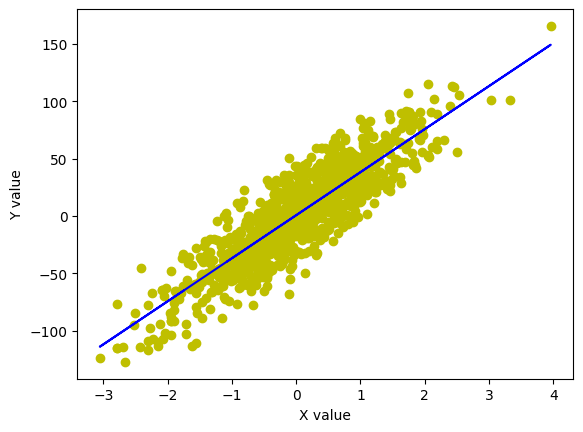

In [24]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#Data creation
x,y=datasets.make_regression(n_samples=1000,n_features=1,noise=20,random_state=1)

X=torch.from_numpy(x.astype(np.float32))
Y=torch.from_numpy(y.astype(np.float32))

#Reshaping Y vector
Y=Y.view(Y.shape[0],1)  #reshaping to one column

n_samples,n_features=X.shape

input_size,output_size=n_features,n_features
#Model Creation class
class MyLinear(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(MyLinear,self).__init__()
        self.lin=nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.lin(x)
    

model=MyLinear(input_size,output_size)
leraning_rate=0.01
n_iter=100
#Estimating the Loss
#For Linear Regression we are estimating the MSE

criteria=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)


#Defining the Trainig Loops

for epoch in range(n_iter):
    #Forward Pass operation
    Y_pred=model(X)
    loss=criteria(Y_pred,Y)
    print("==Training Process Started==\n")
    print("Epoch:",epoch+1," Forward Pass Ended")
    #Backward Pass Operation
    loss.backward()
    print("Epoch:",epoch+1," backward Pass Ended")
    #Updating the weights
    optimizer.step()
    print("Epoch:",epoch+1," Updating the weights")
    
    #Now as the gradients gets summed up. WE need to make it zero (Dont forget)
    optimizer.zero_grad()
    
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}| w={w[0][0].item():.3f} | loss={loss.item():0.3f}')
    print("\n")


#Plotting. detach operating prevents this operation to be tracked in our graph. The detach is now defining that the gradient calculation attribute is now False.
prediction=model(X).detach().numpy()

plt.plot(x,y,'yo')
plt.plot(x,prediction,'b')
plt.xlabel("X value")
plt.ylabel("Y value")
plt.show()

Implmentation of the Logistic Regression. We will working on breast cancer dataset.

In [27]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Data Extraction
dataset=datasets.load_breast_cancer()
X,Y=dataset.data,dataset.target

n_samples,n_features=X.shape
print("Num of Samples:",n_samples)
print("Number of Features",n_features)

#Splitting the data into train_test split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Scalling the data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#Now it might be the case the train test split produces double. So converting it into float32 vector

X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))


#Reshaping Y vector
y_train=y_train.view(y_train.shape[0],1)  #reshaping to one column | making it a column vector
y_test=y_test.view(y_test.shape[0],1)

#Model Creation class
input_size,output_size=n_features,1
class MyLogistic(nn.Module): #Derived from nn.Module
    def __init__(self,input_dim,output_dim):
        super(MyLogistic,self).__init__()
        self.linear=nn.Linear(input_dim,1)

    def forward(self,x):   # We apply Linear Layer then a sigmoid function
        y_predicted=torch.sigmoid(self.linear(x))
        return y_predicted
    

model=MyLogistic(input_size,output_size)

learning_rate=0.01
n_iter=100
#Estimating the Loss
#For Linear Regression we are estimating the MSE


criteria=nn.BCELoss() #Binary cross entropy as the the class label is benign or malignant 

optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)


#Defining the Trainig Loops

for epoch in range(n_iter):
    #Forward Pass operation
    Y_pred=model(X_train)
    print(Y_pred.round())
    loss=criteria(Y_pred,y_train)
    
    print("==Training Process Started==\n")
    print("Epoch:",epoch+1," Forward Pass Ended")
    #Backward Pass Operation
    loss.backward()
    print("Epoch:",epoch+1," backward Pass Ended")
    #Updating the weights
    optimizer.step()
    print("Epoch:",epoch+1," Updating the weights")
    
    #Now as the gradients gets summed up. WE need to make it zero (Dont forget)
    optimizer.zero_grad()
    
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}| w={w[0][0].item():.3f} | loss={loss.item():0.4f}')
    print("\n")


#Evaluation of the model. detach operating prevents this operation to be tracked in our graph. 
#The detach() is now defining that the gradient calculation attribute is now False.

with torch.no_grad():
    predictions=model(X_test)
    predictions_class=predictions.round()
    accuracy=predictions_class.eq(y_test).sum()/y_test.shape[0]

print("Accuracy is:",accuracy)


Num of Samples: 569
Number of Features 30
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      